# Homework #2

Name: Salvatore Zerbo

Course: Math 483

Date: 04/26/2019

# Q9

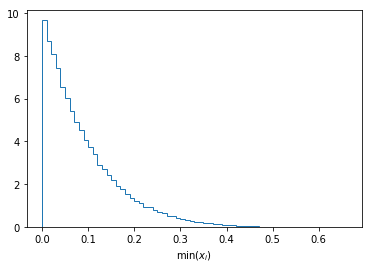

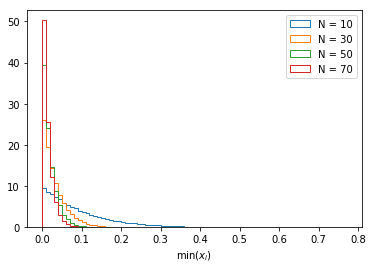

In [55]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(30)

def run_trials(N, num_trials):
    '''
    Runs the desired number of trials and
    chooses N x_i for each trial. Then
    calculates the min and plots the histogram.
    '''
    mins = []
    
    #Run many trials
    for i in range(int(num_trials)):
        #Reset x array
        x = []

        #Choose x_i for i = 1,...,10
        for j in range(0, N):
            x.append(np.random.uniform())

        #Find minimum
        mins.append(min(x))

    plt.hist(mins, bins = np.arange(min(mins), max(mins) + 0.01, 0.01), \
             histtype = "step", label = "N = {}".format(N), density = True)

#First part
run_trials(10, 1E5)
plt.xlabel("min($x_{i}$)")
plt.show()

#Run trials increasing n
for n in [10, 30, 50, 70]:
    run_trials(n, 1E5)
                   
plt.xlabel("min($x_{i}$)")
plt.legend()
plt.show()

By increasing N, the mean of the distribution becomes more strongly centered towards 0. The reason this occurs is because as you choose more $x_{i}$, it becomes increasingly likely that you draw a value close to 0, so the minimum of $x_{i}$ will tend to decrease with more samples.

# Q10

If $min(X_{i}) > t$, then that means the smallest element of the set $X_{i}$ is greater than t. Since the smallest element is greater than t, that means every other element of $X_{i}$ must be greater than t. Then the probability that $min(X_{i}) > t$ would be equal to $Pr(X_{1} > t) * Pr(X_{2} > t) * ... * Pr(X_{n}) > t$ since $X_{i}$ are independent. In other words, $Pr(X_{i} > t) = \prod_{i} Pr(X_{i} > t)$.

This means that the CDF will be:
\begin{equation*}
F(t) = \begin{cases}
  (1-t)^n : x ∈ [0, 1)\\
  0 \ \ \ \ \ \ \ \ \ \ : t \geq 1\\
  1 \ \ \ \ \ \ \ \ \ \ : t < 0\\
\end{cases}
\end{equation*}

Then the pdf will be:

$\frac{dF}{dt} = f(t) = -n(1 - t)^{n-1}$

# Q15

1) Generate a random number u~U(0, 1)

2) Find the inverse of the CDF:

The distribution has pdf $f(x) = nx^{n-1}$. Then the CDF will be $\int_{0}^{t} nx^{n-1} dx= t^n$ or:
\begin{equation*}
F(t) = \begin{cases}
  t^n : x ∈ [0, 1)\\
  0 \ \ \ \ \ \ \ \ \ \ : t < 0\\
  1 \ \ \ \ \ \ \ \ \ \ : t \geq 1\\
\end{cases}
\end{equation*}

Then the inverse of the CDF is:

$F(F^{-1}(u)) = u$

$[F^{-1}(u)]^{n} = u$

$n ln(F^{-1}(u)) = ln(u)$

$ln(F^{-1}(u)) = ln(u^{1/n})$

$F^{-1}(u) = u^{1/n}$

3) Compute $X = F^{-1}(u)$. X will have a pdf $f(x) = nx^{n-1}$ on the interval [0,1]

# Q19

In [115]:
np.random.seed(30)

#Setup
t = 60              #seconds
lamb = 0.05         #per minute
gens = []           #count/60 minutes
doubling_time = []  #time for colony
sing_doub_time = [] #times for single bacterium

#Run 10E4 trials
for n in range(int(10E4)):
    #Reset initial state
    gen = 0
    num_bact = 1                               #number of bacteria
    divide = [np.random.exponential(1 / lamb)] #divide time for 1 bacteria
    num_prev = 1                               #check doubling time
    time_prev = 0                              #time last doubled
    
    #Keep track of doubling time for single bacterium
    sing_doub_time.append(divide[0])
    
    #Run for 60 minutes
    for i in range(t):         
        #Check to see if time is greater than each bacteria's divide time
        for j in range(len(divide)):  
            if i > divide[j]:
                #Divide bacteria
                num_bact += 1
                gen += 1
                
                #Check if doubled
                if num_bact == num_prev * 2:
                    #Don't count doubling from 1->2
                    if num_bact > 2:
                        doubling_time.append(divide[j] - time_prev - 1)
                    
                    #Set to current time and number
                    num_prev = num_bact
                    time_prev = divide[j]
                
                #Remove current division time since it's passed
                divide.remove(divide[j])

                #Time until next divide for the 2 new bacteria
                for k in range(2):
                    divide.append(i + np.random.exponential(1 / lamb))
    
    #Keep track of number of generations for each simulation
    gens.append(gen)

#Output
print("Doubling time for single bacterium: {}".format(np.mean(sing_doub_time)))
print("Doubling time for colony: {}".format(np.mean(doubling_time)))
print("Average number of generations: {}".format(np.mean(gens)))

Doubling time for single bacterium: 20.098049357642946
Doubling time for colony: 13.826660417749158
Average number of generations: 15.40677


The theoretical doubling time for a single bacterium should be $t = \frac{1}{\lambda} = 20$ minutes.
The theoretical doubling time for a colony should be $t = \frac{ln(2)}{\lambda} = 13.86$ minutes.